<a href="https://colab.research.google.com/github/prayansh99/Deep-Learning/blob/master/Cancer-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [787]:
! sudo pip install xgboost

In [788]:
!sudo pip install --upgrade xgboost


     |████████████████████████████████| 109.8MB 98kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
ls

drive/  sample_data/


In [4]:
cd drive/My\ Drive/Tasks

/content/drive/My Drive/Tasks


In [0]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [0]:
data = pd.read_excel('BreastCancer_Prognostic_v1.xlsx')

In [749]:
data

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [750]:
dt = data.drop(['ID'], axis = 1)
dt

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [751]:
# Data set without std_dev and Worst values
dt_m = dt.drop(dt.iloc[:,12:34], axis = 1)
# dt_m = dt_m.drop(dt.iloc[:,1:2], axis = 1)
dt_m

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
193,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262
194,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105
195,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392
196,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472


In [510]:
# Data set without mean and Worst values
dt_sd = dt.drop(dt.iloc[:,2:12], axis = 1)
dt_sd = dt_sd.drop(dt.iloc[:,22:34], axis = 1)
dt_sd

,Outcome,Time,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev
0,N,31,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495
1,N,61,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193
2,N,116,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039
3,N,123,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208
4,R,27,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...
193,N,10,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922
194,N,8,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168
195,N,12,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377
196,R,3,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979


In [511]:
# Data set without std_dev and mean values
dt_W = dt.drop(dt.iloc[:,2:22], axis = 1)
dt_W = dt_W.drop(dt.iloc[:,32:34], axis = 1)
dt_W

,Outcome,Time,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension
0,N,31,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113
1,N,61,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
2,N,116,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067
3,N,123,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,R,27,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...
193,N,10,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788
194,N,8,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024
195,N,12,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033
196,R,3,28.34,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981


In [752]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column: ")
print(dt.apply(num_missing, axis=0))

Missing values per column: 
Outcome                      0
Time                         0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_std_dev               0
texture_std_dev              0
perimeter_std_dev            0
area_std_dev                 0
smoothness_std_dev           0
compactness_std_dev          0
concavity_std_dev            0
concave_points_std_dev       0
symmetry_std_dev             0
fractal_dimension_std_dev    0
Worst_radius                 0
Worst_texture                0
Worst_perimeter              0
Worst_area                   0
Worst_smoothness             0
Worst_compactness            0
Worst_concavity              0
Worst_concave_points         0
Worst_symmetry               0
Worst_fract

N    151
R     47
Name: Outcome, dtype: int64


<function matplotlib.pyplot.show>

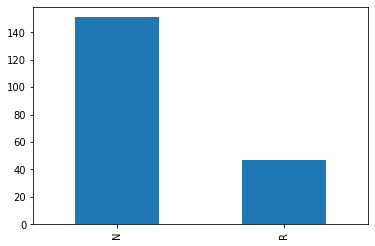

In [753]:
dt['Outcome'].value_counts().plot(kind = 'bar')
print(dt['Outcome'].value_counts())
plt.show

With Mean Values



In [754]:
print(dt_m.dtypes)

Outcome                    object
Time                        int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object


In [755]:
#Describe
dt_m.describe()

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
count,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,0.192754,0.062706
std,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,0.027437,0.007240
min,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250
25%,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,0.174075,0.056718
50%,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,0.189350,0.061715
75%,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,0.209325,0.066715
max,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440


In [756]:
# Check for correlation
dt_m.corr()

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
Time,1.000000,-0.344722,-0.264671,-0.346080,-0.344031,0.164793,0.010000,-0.139475,-0.171841,0.177311,0.269992
radius_mean,-0.344722,1.000000,0.143456,0.995933,0.992855,-0.158239,0.159017,0.469518,0.664010,-0.051610,-0.416674
texture_mean,-0.264671,0.143456,1.000000,0.142033,0.140440,-0.192262,-0.039803,0.037165,0.006687,-0.165166,-0.145572
perimeter_mean,-0.346080,0.995933,0.142033,1.000000,0.990699,-0.102912,0.236721,0.533194,0.712766,-0.006512,-0.353560
area_mean,-0.344031,0.992855,0.140440,0.990699,1.000000,-0.141470,0.163176,0.475862,0.667530,-0.060785,-0.397733
smoothness_mean,0.164793,-0.158239,-0.192262,-0.102912,-0.141470,1.000000,0.666559,0.623867,0.545734,0.540761,0.744890
compactness_mean,0.010000,0.159017,-0.039803,0.236721,0.163176,0.666559,1.000000,0.836015,0.716438,0.666822,0.735474
concavity_mean,-0.139475,0.469518,0.037165,0.533194,0.475862,0.623867,0.836015,1.000000,0.909990,0.524861,0.449928
concave_points_mean,-0.171841,0.664010,0.006687,0.712766,0.667530,0.545734,0.716438,0.909990,1.000000,0.429968,0.268210
symmetry_mean,0.177311,-0.051610,-0.165166,-0.006512,-0.060785,0.540761,0.666822,0.524861,0.429968,1.000000,0.604104


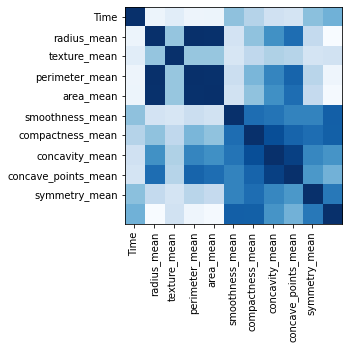

In [757]:
plt.imshow(dt_m.corr(), cmap = plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(dt_m.iloc[1:11]))]
plt.xticks(tick_marks, dt_m.iloc[:, 1:11], rotation = 'vertical')
plt.yticks(tick_marks, dt_m.iloc[:, 1:11])

plt.show()

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import manifold

In [0]:
from pandas.plotting import parallel_coordinates
from pandas.plotting import scatter_matrix

In [0]:
x = dt_m.iloc[:,1:]
y = dt_m.iloc[:,0:1]

In [761]:
label_enc = preprocessing.LabelEncoder()
y = label_enc.fit_transform(y)
y

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 12)

In [0]:
scale = preprocessing.StandardScaler(copy = True, with_mean = True, with_std = True)
scale.fit(x_train)

x_train_std = scale.transform(x_train)
x_test_std = scale.transform(x_test)

In [764]:
x_train_std.var()

1.0

In [738]:
x_train.var()

Time                         525.637255
radius_mean                   11.524243
texture_mean                  14.110995
perimeter_mean               523.285830
area_mean                 157569.137799
smoothness_mean                0.000109
compactness_mean               0.001580
concavity_mean                 0.003557
concave_points_mean            0.001128
symmetry_mean                  0.000486
fractal_dimension_mean         0.000046
dtype: float64

In [0]:
#Implement PCA
pca1 = PCA(n_components=7, svd_solver='randomized')
pca1.fit(x_train_std)

x_train_std_pca = pca1.transform(x_train_std)
x_test_std_pca = pca1.transform(x_test_std)

In [766]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train_std_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [768]:
from sklearn.metrics import confusion_matrix
predicted = logreg.predict(x_test_std_pca)
matrix = confusion_matrix(y_test, predicted)
matrix

array([[37,  5],
       [ 6,  2]])

In [769]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.29      0.25      0.27         8

    accuracy                           0.78        50
   macro avg       0.57      0.57      0.57        50
weighted avg       0.77      0.78      0.77        50



In [770]:
from sklearn.tree import DecisionTreeClassifier
reg1 = DecisionTreeClassifier(criterion="entropy", max_depth=2)
reg1.fit(x_train_std_pca, y_train)
reg1.score(x_test_std_pca, y_test)

0.76

In [771]:
from sklearn.metrics import confusion_matrix
predicted = reg1.predict(x_test_std_pca)
matrix = confusion_matrix(y_test, predicted)
matrix

array([[37,  5],
       [ 7,  1]])

In [772]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.17      0.12      0.14         8

    accuracy                           0.76        50
   macro avg       0.50      0.50      0.50        50
weighted avg       0.73      0.76      0.75        50



In [773]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train_std_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [774]:
from sklearn.metrics import confusion_matrix
predicted = knn.predict(x_test_std_pca)
matrix = confusion_matrix(y_test, predicted)
matrix

array([[39,  3],
       [ 6,  2]])

In [775]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.40      0.25      0.31         8

    accuracy                           0.82        50
   macro avg       0.63      0.59      0.60        50
weighted avg       0.79      0.82      0.80        50



In [776]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train_std_pca, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [777]:
from sklearn.metrics import confusion_matrix
predicted = model.predict(x_test_std_pca)
matrix = confusion_matrix(y_test, predicted)
matrix

array([[37,  5],
       [ 7,  1]])

In [778]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.17      0.12      0.14         8

    accuracy                           0.76        50
   macro avg       0.50      0.50      0.50        50
weighted avg       0.73      0.76      0.75        50



In [796]:
from xgboost import XGBClassifier
model1 = XGBClassifier()
model1.fit(x_train_std_pca, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [794]:
from sklearn.metrics import confusion_matrix
predicted = model1.predict(x_test_std_pca)
matrix = confusion_matrix(y_test, predicted)
matrix

array([[35,  7],
       [ 6,  2]])

In [795]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.22      0.25      0.24         8

    accuracy                           0.74        50
   macro avg       0.54      0.54      0.54        50
weighted avg       0.75      0.74      0.75        50



In [779]:
from sklearn.svm import SVC
SVCmodel = SVC(C = 14, gamma = 0.01, kernel = 'rbf')
SVCmodel = SVCmodel.fit(x_train_std_pca, y_train)
SVCmodel.score(x_test_std_pca, y_test)

0.86

In [780]:
from sklearn.metrics import confusion_matrix
predicted = SVCmodel.predict(x_test_std_pca)
matrix = confusion_matrix(y_test, predicted)
matrix

array([[41,  1],
       [ 6,  2]])

In [781]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.67      0.25      0.36         8

    accuracy                           0.86        50
   macro avg       0.77      0.61      0.64        50
weighted avg       0.84      0.86      0.83        50



In [782]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVCmodel, x_train_std_pca, y_train, cv=8)

array([0.73684211, 0.78947368, 0.68421053, 0.89473684, 0.88888889,
       0.77777778, 0.83333333, 0.77777778])

In [783]:
cross_val_score(SVCmodel, x_train_std_pca, y_train, cv=8).mean()

0.7978801169590644

In [784]:
cross_val_score(SVCmodel, x_train_std_pca, y_train, cv=8, scoring = 'roc_auc').mean()

0.7648008241758242

In [785]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.67      0.25      0.36         8

    accuracy                           0.86        50
   macro avg       0.77      0.61      0.64        50
weighted avg       0.84      0.86      0.83        50



With STD Deviation Values



In [121]:
print(dt_sd.dtypes)

Outcome                       object
radius_std_dev               float64
texture_std_dev              float64
perimeter_std_dev            float64
area_std_dev                 float64
smoothness_std_dev           float64
compactness_std_dev          float64
concavity_std_dev            float64
concave_points_std_dev       float64
symmetry_std_dev             float64
fractal_dimension_std_dev    float64
dtype: object


In [122]:
#Describe
dt_sd.describe()

,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.603346,1.264450,4.255394,70.228737,0.006762,0.031199,0.040750,0.015099,0.020555,0.003987
std,0.310112,0.526467,2.194128,47.982255,0.002974,0.017613,0.020869,0.005504,0.009578,0.001938
min,0.193800,0.362100,1.153000,13.990000,0.002667,0.007347,0.010940,0.005174,0.007882,0.001087
25%,0.388200,0.921300,2.742500,35.365000,0.005001,0.019803,0.026810,0.011422,0.014795,0.002748
50%,0.533250,1.168500,3.767000,58.455000,0.006193,0.027880,0.036910,0.014175,0.017905,0.003719
75%,0.750900,1.463250,5.212750,92.477500,0.007973,0.038335,0.048970,0.017665,0.022880,0.004630
max,1.819000,3.503000,13.280000,316.000000,0.031130,0.135400,0.143800,0.039270,0.060410,0.012560


In [123]:
# Check for correlation
dt_sd.corr()

,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev
radius_std_dev,1.000000,0.341365,0.973267,0.956929,0.212261,0.186815,0.310532,0.537011,0.253774,0.188546
texture_std_dev,0.341365,1.000000,0.374428,0.261746,0.407036,0.285564,0.339956,0.427772,0.293346,0.287900
perimeter_std_dev,0.973267,0.374428,1.000000,0.929603,0.220245,0.267606,0.363244,0.592707,0.276477,0.239101
area_std_dev,0.956929,0.261746,0.929603,1.000000,0.138948,0.145281,0.260979,0.423337,0.165206,0.135502
smoothness_std_dev,0.212261,0.407036,0.220245,0.138948,1.000000,0.474982,0.643395,0.589114,0.328773,0.538804
compactness_std_dev,0.186815,0.285564,0.267606,0.145281,0.474982,1.000000,0.813994,0.537276,0.516171,0.845176
concavity_std_dev,0.310532,0.339956,0.363244,0.260979,0.643395,0.813994,1.000000,0.695257,0.514692,0.716976
concave_points_std_dev,0.537011,0.427772,0.592707,0.423337,0.589114,0.537276,0.695257,1.000000,0.486877,0.560597
symmetry_std_dev,0.253774,0.293346,0.276477,0.165206,0.328773,0.516171,0.514692,0.486877,1.000000,0.427423
fractal_dimension_std_dev,0.188546,0.287900,0.239101,0.135502,0.538804,0.845176,0.716976,0.560597,0.427423,1.000000


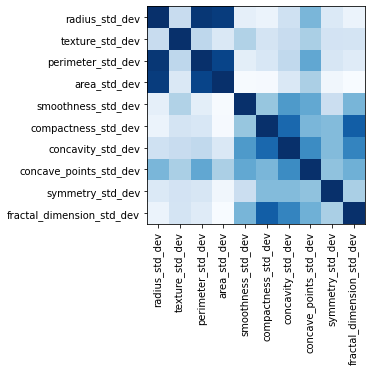

In [124]:
plt.imshow(dt_sd.corr(), cmap = plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(dt_sd.iloc[1:11]))]
plt.xticks(tick_marks, dt_sd.iloc[:, 1:11], rotation = 'vertical')
plt.yticks(tick_marks, dt_sd.iloc[:, 1:11])

plt.show()

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import manifold

In [0]:
from pandas.plotting import parallel_coordinates
from pandas.plotting import scatter_matrix

In [0]:
x = dt_sd.iloc[:,1:]
y = dt_sd.iloc[:,0:1]

In [128]:
label_enc = preprocessing.LabelEncoder()
y = label_enc.fit_transform(y)
y

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12)

In [0]:
scale = preprocessing.StandardScaler(copy = True, with_mean = True, with_std = True)
scale.fit(x_train)

x_train_std = scale.transform(x_train)
x_test_std = scale.transform(x_test)

In [131]:
x_train_std.var()

1.0

In [132]:
x_train.var()

radius_std_dev                  0.095024
texture_std_dev                 0.285818
perimeter_std_dev               4.972652
area_std_dev                 2302.462564
smoothness_std_dev              0.000006
compactness_std_dev             0.000361
concavity_std_dev               0.000414
concave_points_std_dev          0.000026
symmetry_std_dev                0.000103
fractal_dimension_std_dev       0.000004
dtype: float64

In [0]:
#Implement PCA
pca1 = PCA(n_components=7, svd_solver='randomized')
pca1.fit(x_train_std)

x_train_std_pca = pca1.transform(x_train_std)
x_test_std_pca = pca1.transform(x_test_std)

In [141]:
from sklearn.svm import SVC
SVCmodel = SVC(C = 0.9, gamma = 0.063, kernel = 'rbf')
SVCmodel = SVCmodel.fit(x_train_std_pca, y_train)
SVCmodel.score(x_test_std_pca, y_test)

0.8166666666666667

In [142]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVCmodel, x_train_std_pca, y_train, cv=10)

array([0.78571429, 0.78571429, 0.71428571, 0.71428571, 0.71428571,
       0.64285714, 0.71428571, 0.71428571, 0.76923077, 0.76923077])

In [143]:
cross_val_score(SVCmodel, x_train_std_pca, y_train, cv=10).mean()

0.7324175824175824

In [144]:
cross_val_score(SVCmodel, x_train_std_pca, y_train, cv=10, scoring = 'roc_auc').mean()

0.6048484848484849

In [145]:
from sklearn.metrics import confusion_matrix
predicted = SVCmodel.predict(x_test_std_pca)
matrix = confusion_matrix(y_test, predicted)
matrix

array([[49,  0],
       [11,  0]])

In [139]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        49
           1       0.00      0.00      0.00        11

    accuracy                           0.82        60
   macro avg       0.41      0.50      0.45        60
weighted avg       0.67      0.82      0.73        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With worst Values



In [186]:
print(dt_W.dtypes)

Outcome                       object
radius_std_dev               float64
texture_std_dev              float64
perimeter_std_dev            float64
area_std_dev                 float64
smoothness_std_dev           float64
compactness_std_dev          float64
concavity_std_dev            float64
concave_points_std_dev       float64
symmetry_std_dev             float64
fractal_dimension_std_dev    float64
Worst_radius                 float64
Worst_texture                float64
Worst_perimeter              float64
Worst_area                   float64
Worst_smoothness             float64
Worst_compactness            float64
Worst_concavity              float64
Worst_concave_points         float64
Worst_symmetry               float64
Worst_fractal_dimension      float64
dtype: object


In [187]:
#Describe
dt_W.describe()

,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.603346,1.264450,4.255394,70.228737,0.006762,0.031199,0.040750,0.015099,0.020555,0.003987,21.021818,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828
std,0.310112,0.526467,2.194128,47.982255,0.002974,0.017613,0.020869,0.005504,0.009578,0.001938,4.242997,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172
min,0.193800,0.362100,1.153000,13.990000,0.002667,0.007347,0.010940,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040
25%,0.388200,0.921300,2.742500,35.365000,0.005001,0.019803,0.026810,0.011422,0.014795,0.002748,17.632500,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577
50%,0.533250,1.168500,3.767000,58.455000,0.006193,0.027880,0.036910,0.014175,0.017905,0.003719,20.525000,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890
75%,0.750900,1.463250,5.212750,92.477500,0.007973,0.038335,0.048970,0.017665,0.022880,0.004630,23.730000,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375
max,1.819000,3.503000,13.280000,316.000000,0.031130,0.135400,0.143800,0.039270,0.060410,0.012560,35.130000,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500


In [188]:
# Check for correlation
dt_W.corr()

,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension
radius_std_dev,1.000000,0.341365,0.973267,0.956929,0.212261,0.186815,0.310532,0.537011,0.253774,0.188546,0.653635,-0.143369,0.660942,0.656442,-0.228740,-0.140472,-0.034290,0.229593,-0.227902,-0.265243
texture_std_dev,0.341365,1.000000,0.374428,0.261746,0.407036,0.285564,0.339956,0.427772,0.293346,0.287900,-0.033230,0.401277,-0.012545,-0.031464,-0.101748,-0.146005,-0.103871,-0.109804,-0.228037,-0.173675
perimeter_std_dev,0.973267,0.374428,1.000000,0.929603,0.220245,0.267606,0.363244,0.592707,0.276477,0.239101,0.625588,-0.122254,0.663958,0.627129,-0.229088,-0.073668,0.019657,0.275071,-0.215541,-0.231810
area_std_dev,0.956929,0.261746,0.929603,1.000000,0.138948,0.145281,0.260979,0.423337,0.165206,0.135502,0.772286,-0.106107,0.776267,0.793467,-0.241462,-0.126673,-0.001336,0.275015,-0.232644,-0.276872
smoothness_std_dev,0.212261,0.407036,0.220245,0.138948,1.000000,0.474982,0.643395,0.589114,0.328773,0.538804,-0.133839,-0.082080,-0.107891,-0.134124,0.251764,-0.028113,0.045155,0.024474,-0.146274,-0.017428
compactness_std_dev,0.186815,0.285564,0.267606,0.145281,0.474982,1.000000,0.813994,0.537276,0.516171,0.845176,-0.016804,0.019361,0.062830,-0.029747,0.212309,0.664129,0.568806,0.420393,0.284148,0.479000
concavity_std_dev,0.310532,0.339956,0.363244,0.260979,0.643395,0.813994,1.000000,0.695257,0.514692,0.716976,0.057881,-0.034301,0.128143,0.035591,0.146979,0.395843,0.585400,0.393513,0.125586,0.241911
concave_points_std_dev,0.537011,0.427772,0.592707,0.423337,0.589114,0.537276,0.695257,1.000000,0.486877,0.560597,0.104914,-0.197387,0.153675,0.078840,-0.087175,0.046090,0.131590,0.294575,-0.118515,-0.057835
symmetry_std_dev,0.253774,0.293346,0.276477,0.165206,0.328773,0.516171,0.514692,0.486877,1.000000,0.427423,-0.052187,-0.164564,-0.022235,-0.076271,-0.006900,0.175221,0.164151,0.170082,0.540420,0.085109
fractal_dimension_std_dev,0.188546,0.287900,0.239101,0.135502,0.538804,0.845176,0.716976,0.560597,0.427423,1.000000,-0.107708,-0.065060,-0.045958,-0.111979,0.282408,0.518034,0.453047,0.340270,0.203297,0.581984


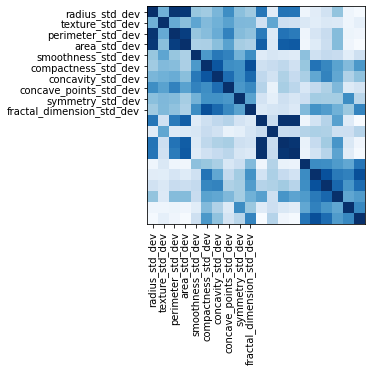

In [189]:
plt.imshow(dt_W.corr(), cmap = plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(dt_W.iloc[1:11]))]
plt.xticks(tick_marks, dt_W.iloc[:, 1:11], rotation = 'vertical')
plt.yticks(tick_marks, dt_W.iloc[:, 1:11])

plt.show()

In [0]:
x = dt_W.iloc[:,1:]
y = dt_W.iloc[:,0:1]

In [191]:
label_enc = preprocessing.LabelEncoder()
y = label_enc.fit_transform(y)
y

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12)

In [0]:
scale = preprocessing.StandardScaler(copy = True, with_mean = True, with_std = True)
scale.fit(x_train)

x_train_std = scale.transform(x_train)
x_test_std = scale.transform(x_test)

In [194]:
x_train_std.var()

1.0

In [195]:
x_train.var()

radius_std_dev                    0.095024
texture_std_dev                   0.285818
perimeter_std_dev                 4.972652
area_std_dev                   2302.462564
smoothness_std_dev                0.000006
compactness_std_dev               0.000361
concavity_std_dev                 0.000414
concave_points_std_dev            0.000026
symmetry_std_dev                  0.000103
fractal_dimension_std_dev         0.000004
Worst_radius                     17.482949
Worst_texture                    31.547441
Worst_perimeter                 823.500192
Worst_area                   337600.100066
Worst_smoothness                  0.000444
Worst_compactness                 0.026553
Worst_concavity                   0.027366
Worst_concave_points              0.002004
Worst_symmetry                    0.005856
Worst_fractal_dimension           0.000454
dtype: float64

In [0]:
#Implement PCA
pca1 = PCA(n_components=7, svd_solver='randomized')
pca1.fit(x_train_std)

x_train_std_pca = pca1.transform(x_train_std)
x_test_std_pca = pca1.transform(x_test_std)

In [197]:
from sklearn.svm import SVC
SVCmodel = SVC(C = 0.9, gamma = 0.063, kernel = 'rbf')
SVCmodel = SVCmodel.fit(x_train_std_pca, y_train)
SVCmodel.score(x_test_std_pca, y_test)

0.8166666666666667

In [198]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVCmodel, x_train_std_pca, y_train, cv=10)

array([0.78571429, 0.78571429, 0.71428571, 0.71428571, 0.71428571,
       0.64285714, 0.64285714, 0.71428571, 0.76923077, 0.76923077])

In [199]:
cross_val_score(SVCmodel, x_train_std_pca, y_train, cv=10).mean()

0.7252747252747253

In [200]:
cross_val_score(SVCmodel, x_train_std_pca, y_train, cv=10, scoring = 'roc_auc').mean()

0.5160606060606061

In [201]:
from sklearn.metrics import confusion_matrix
predicted = SVCmodel.predict(x_test_std_pca)
matrix = confusion_matrix(y_test, predicted)
matrix

array([[49,  0],
       [11,  0]])

In [202]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        49
           1       0.00      0.00      0.00        11

    accuracy                           0.82        60
   macro avg       0.41      0.50      0.45        60
weighted avg       0.67      0.82      0.73        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
data = data[data['Lymph_Node_Status'] != '?']

### Part 2

In [698]:
# data2 = data[data['Outcome'] == 'R']
# data2

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.017560,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.029870,0.04561,0.013570,0.017740,0.005114,15.51,20.37,107.3,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.014860,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
13,847990,R,36,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.042400,0.04741,0.010900,0.018570,0.005466,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6
15,848620,R,10,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,3.854,54.18,0.007026,0.025010,0.03188,0.012970,0.016890,0.004142,20.96,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1
17,851509,R,10,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.012590,0.01715,0.010380,0.010830,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,4.0,1
34,855625,R,9,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.100600,0.09723,0.026380,0.053330,0.007646,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380,2.3,0
37,857010,R,8,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,0.06049,0.6289,0.6633,4.293,71.56,0.006294,0.039940,0.05554,0.016950,0.024280,0.003535,22.82,21.32,150.6,1567.0,0.1679,0.5090,0.7345,0.2378,0.3799,0.09185,1.8,0
39,857438,R,48,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.91,0.004675,0.010300,0.01603,0.009222,0.010950,0.001629,18.10,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873,2.5,0
40,857637,R,11,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,0.7275,1.1930,4.837,102.50,0.006458,0.023060,0.02945,0.015380,0.018520,0.002608,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294,3.2,13


In [801]:
# dt2 = data2.drop(data2.iloc[:,0:2], axis =1 )
dt2 = dt_m
dt2

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
193,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262
194,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105
195,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392
196,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472


In [0]:
dt2 = dt2[dt2['Outcome'] == 'R']

In [817]:
x1 = dt2.drop(dt2.iloc[:, 0:1], axis = 1)
y1 = dt2.iloc[:,1:2]
x1

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
4,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,0.07164
7,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
13,36,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077
15,10,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356
17,10,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278
34,9,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343
37,8,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,0.06049
39,48,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684
40,11,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961


In [818]:
y1

,Time
4,27
5,77
7,77
13,36
15,10
17,10
34,9
37,8
39,48
40,11


In [0]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 10)

In [0]:
scale = preprocessing.StandardScaler(copy = True, with_mean = True, with_std = True)
scale.fit(x1_train)

x1_train_std = scale.transform(x1_train)
x1_test_std = scale.transform(x1_test)

In [821]:
x1_train_std.var()

0.9999999999999999

In [0]:
#Implement PCA
pca1 = PCA(n_components=7, svd_solver='randomized')
pca1.fit(x1_train_std)

x1_train_std_pca = pca1.transform(x1_train_std)
x1_test_std_pca = pca1.transform(x1_test_std)

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x1_train_std_pca, y1_train)
y1_pred = reg.predict(x1_test_std_pca)

In [824]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 0.45312227455128423
Mean Squared Error: 0.3662911786507009
Root Mean Squared Error: 0.6052199423769022


In [825]:
from xgboost import XGBClassifier
model2 = XGBClassifier()
model2.fit(x1_train_std_pca, y1_train)
y2_pred = model2.predict(x1_test_std_pca)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [826]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y2_pred)))

Mean Absolute Error: 0.45312227455128423
Mean Squared Error: 0.3662911786507009
Root Mean Squared Error: 29.066590213966734


In [827]:
y1.mean()

Time    25.085106
dtype: float64

In [828]:
y1_pred

array([[49.31659274],
       [17.66316365],
       [12.36631025],
       [ 9.42126464],
       [13.66159134],
       [16.52204535],
       [37.31284118],
       [24.12786799],
       [ 8.17561051],
       [ 8.75100099],
       [ 0.77885244],
       [77.92440107],
       [ 9.01646462],
       [ 3.53799609],
       [33.94986902]])

In [829]:
res = pd.DataFrame(y1_pred)
res

,0
0,49.316593
1,17.663164
2,12.366310
3,9.421265
4,13.661591
5,16.522045
6,37.312841
7,24.127868
8,8.175611
9,8.751001


In [830]:
res.index = x1_test.index # its important for comparison
res

,0
143,49.316593
105,17.663164
157,12.366310
152,9.421265
176,13.661591
75,16.522045
13,37.312841
128,24.127868
37,8.175611
34,8.751001


In [670]:
res.columns = ["prediction"]
res

,prediction
143,46.308392
105,-9.501502
157,38.869209
152,19.739250
176,10.528416
75,-3.545050
13,56.585442
128,15.195275
37,21.682106
34,8.226957


In [0]:
res.to_excel("output.xlsx", index = None)